# Exploratory analysis of the GrassClover dataset

### 1. Synthetic images with labels

In [2]:
!wget https://vision.eng.au.dk/?download=/data/GrassClover/synthetic_images.zip -O synthetic_images.zip

--2024-07-04 12:48:04--  https://vision.eng.au.dk/?download=/data/GrassClover/synthetic_images.zip
Resolving vision.eng.au.dk (vision.eng.au.dk)... 185.45.20.49
Connecting to vision.eng.au.dk (vision.eng.au.dk)|185.45.20.49|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /data/GrassClover/synthetic_images.zip [following]
--2024-07-04 12:48:05--  https://vision.eng.au.dk/data/GrassClover/synthetic_images.zip
Reusing existing connection to vision.eng.au.dk:443.
HTTP request sent, awaiting response... 200 OK
Length: 78638775808 (73G) [application/zip]
Saving to: ‘synthetic_images.zip’

synthetic_images.zi   0%[                    ] 403.70M  31.7MB/s    eta 49m 10s^C


### 'Biomass' images (train & test)

In [ ]:
!wget https://vision.eng.au.dk/?download=/data/GrassClover/biomass_data.zip -O biomass_data.zip

--2024-07-02 11:10:32--  https://vision.eng.au.dk/?download=/data/GrassClover/biomass_data.zip
Resolving vision.eng.au.dk (vision.eng.au.dk)... 185.45.20.49
Connecting to vision.eng.au.dk (vision.eng.au.dk)|185.45.20.49|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /data/GrassClover/biomass_data.zip [following]
--2024-07-02 11:10:33--  https://vision.eng.au.dk/data/GrassClover/biomass_data.zip
Reusing existing connection to vision.eng.au.dk:443.
HTTP request sent, awaiting response... 200 OK
Length: 2188069519 (2.0G) [application/zip]
Saving to: ‘biomass_data.zip’

biomass_data.zip    100%[===================>]   2.04G  1.17MB/s    in 15m 17s 

2024-07-02 11:25:50 (2.28 MB/s) - ‘biomass_data.zip’ saved [2188069519/2188069519]



In [ ]:
!unzip biomass_data.zip -d biomass_data

Archive:  biomass_data.zip
   creating: biomass_data/test/
  inflating: biomass_data/test/biomass_test_data.csv  
   creating: biomass_data/test/images/
  inflating: biomass_data/test/images/biomass_image_test_0026.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0033.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0152.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0081.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0115.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0068.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0088.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0125.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0096.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0061.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0147.jpg  
  inflating: biomass_data/test/images/biomass_image_test_0005.jpg  
  inflating: biomass_data/test/

In [ ]:
# Get number of train / test images
print("Num train images:")
!ls biomass_data/train/images/ | wc -l
print("Num test images:")
!ls biomass_data/test/images/ | wc -l

Num train images:
261
Num test images:
174


In [ ]:
!cat biomass_data/train/biomass_train_data.csv | head

﻿image_file_name;acquisition_year;seasonal_harvest_no;label_type;fresh_grass;dry_grass;fresh_white_clover;dry_white_clover;fresh_red_clover;dry_red_clover;fresh_clover;dry_clover;fresh_weeds;dry_weeds;dry_total;dry_clover_fraction;dry_red_clover_fraction;dry_white_clover_fraction;dry_grass_fraction;dry_weeds_fraction
biomass_image_train_0000.jpg;2017;1;semi_advance;630.65;103.48;240.39;27.84;0;0;240.39;27.84;30.96;3.98;135.3;0.205764967;0;0.205764967;0.764818921;0.029416112
biomass_image_train_0001.jpg;2017;1;basic;588.56;124.88;;;;;91.27;12.58;0;0;137.46;0.091517532;0;0;0.908482468;0
biomass_image_train_0002.jpg;2017;1;semi_advance;437.74;83.06;3.91;0.64;0;0;3.91;0.64;27.38;3.44;87.14;0.007344503;0;0.007344503;0.953178793;0.039476704
biomass_image_train_0003.jpg;2017;4;advance;72.39;9.92;221.12;26.86;8.98;1.51;230.1;28.37;80.44;9.76;48.05;0.590426639;0.031425598;0.559001041;0.206451613;0.203121748
biomass_image_train_0004.jpg;2017;1;basic;111.21;23.14;;;;;417.18;61.11;0;0;84.25;0.7253

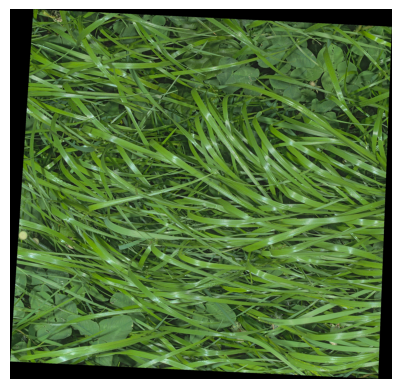

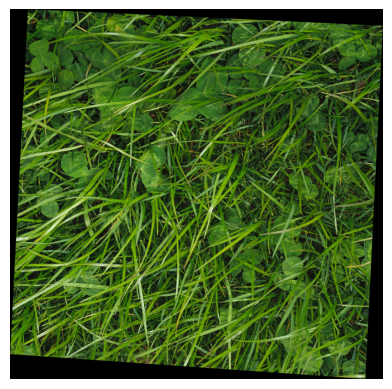

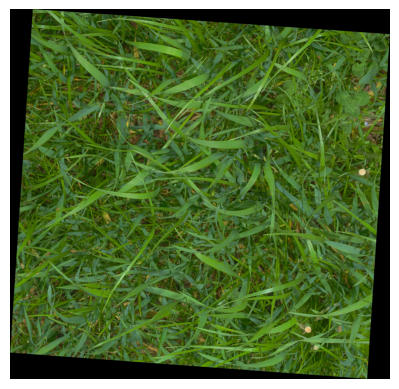

In [ ]:
# example images

from PIL import Image
import matplotlib.pyplot as plt

# Load the image
images_glob = "biomass_data/train/images/*.jpg"
image_paths = !ls $images_glob

for path in image_paths[:3]:

  image = Image.open(path)

  plt.imshow(image)
  plt.axis('off')  # Hide the axes
  plt.show()

### Test images for semantic segmentation (no labels)

In [ ]:
!wget https://vision.eng.au.dk/?download=/data/GrassClover/semantic_segmentation_data.zip -O semantic_segmentation_data.zip

--2024-07-02 11:09:33--  https://vision.eng.au.dk/?download=/data/GrassClover/semantic_segmentation_data.zip
Resolving vision.eng.au.dk (vision.eng.au.dk)... 185.45.20.49
Connecting to vision.eng.au.dk (vision.eng.au.dk)|185.45.20.49|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /data/GrassClover/semantic_segmentation_data.zip [following]
--2024-07-02 11:09:34--  https://vision.eng.au.dk/data/GrassClover/semantic_segmentation_data.zip
Reusing existing connection to vision.eng.au.dk:443.
HTTP request sent, awaiting response... 200 OK
Length: 70948036 (68M) [application/zip]
Saving to: ‘semantic_segmentation_data.zip’

semantic_segmentati 100%[===================>]  67.66M  15.9MB/s    in 11s     

2024-07-02 11:09:46 (5.89 MB/s) - ‘semantic_segmentation_data.zip’ saved [70948036/70948036]



In [ ]:
!unzip semantic_segmentation_data.zip -d semantic_segmentation_data

Archive:  semantic_segmentation_data.zip
   creating: semantic_segmentation_data/images/
   creating: semantic_segmentation_data/images/test/
  inflating: semantic_segmentation_data/images/test/semantic_segmentation_image_test_00.jpg  
  inflating: semantic_segmentation_data/images/test/semantic_segmentation_image_test_01.jpg  
  inflating: semantic_segmentation_data/images/test/semantic_segmentation_image_test_02.jpg  
  inflating: semantic_segmentation_data/images/test/semantic_segmentation_image_test_03.jpg  
  inflating: semantic_segmentation_data/images/test/semantic_segmentation_image_test_04.jpg  
  inflating: semantic_segmentation_data/images/test/semantic_segmentation_image_test_05.jpg  
  inflating: semantic_segmentation_data/images/test/semantic_segmentation_image_test_06.jpg  
  inflating: semantic_segmentation_data/images/test/semantic_segmentation_image_test_07.jpg  
  inflating: semantic_segmentation_data/images/test/semantic_segmentation_image_test_08.jpg  
  inflating:

In [ ]:
!cat semantic_segmentation_data/semantic_segmentation_challenge_class_assignments.txt

test_class_label;class_name
0;grass
1;white clover
2;red clover
3;weeds
4;soil

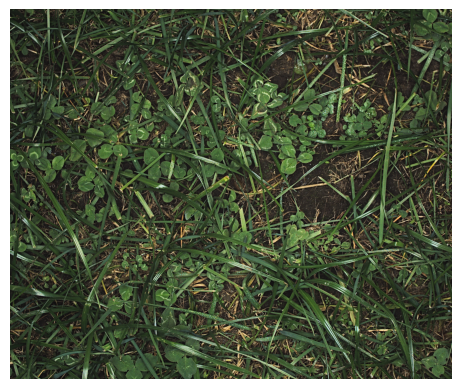

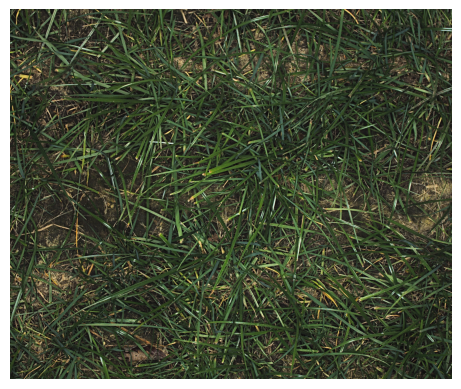

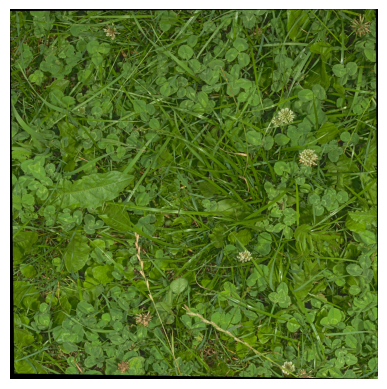

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
images_glob = "semantic_segmentation_data/images/test/*.jpg"
image_paths = !ls $images_glob

for path in image_paths[:3]:

  image = Image.open(path)

  plt.imshow(image)
  plt.axis('off')  # Hide the axes
  plt.show()